# Яндекс.Недвижимость

**Цель исследования** - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. 

**Ход исследования**

Данные о поведении пользователей сохранены в файле `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных. Затем, на этапе предобработки данных будем исправлять самые критичные ошибки данных.
 
 Таким образом, исследование будет состоять из пяти основных этапов:
 1. Загрузка и обзор данных.
 2. Предобработка данных.
 3. Добавление новых столбцов со следующими параметрами:  
    -цена одного квадратного метра;  
    -день недели публикации объявления;  
    -месяц публикации объявления;  
    -год публикации объявления;  
    -тип этажа квартиры;  
    -расстояние до центра города в километрах.   
 
 4. Исследовательский анализ данных.  
 5. Общий вывод. 

### Загрузка и обзор данных

In [150]:
import pandas as pd
data = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Рабочий стол\Data Analyst\data\real_estate_data.csv',sep='\t')


*Импортируем библиотеку pandas, создаю DataFrame с названием data и с аргументом sep='\t'*

**Изучаю основную информацию о датафрейме**

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Количество строк 23699    
 Количество столбцов 22  
 Тип данных в столбцах bool(2), float64(13), int64(3), object(4)*

**Выводим первые 5 строк датафрейма на экран**

In [152]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


**Чтобы узнать разброс значений, среднюю стоимость и медиану, используем метод .describe()**

In [153]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


*В столбце floors_total аномально высокое значение: 60 этажей  
В столбце living_area аномально низкое значение: 2(м²)  
В столбце ceiling_height аномально низкое значение: 1  
В столбце ceiling_height аномально высокое значение: 100*  	


**Изучаю корректность заголовков таблицы**

In [154]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [155]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest', 
        'parks_around3000': 'parks_around_3000', 
        'ponds_around3000': 'ponds_around_3000',
    }
)            

*Все наименования столбцов приведены в порядок и пригодны для дальнейшей работы*

**Построим общую гистограмму для всех столбцов таблицы**

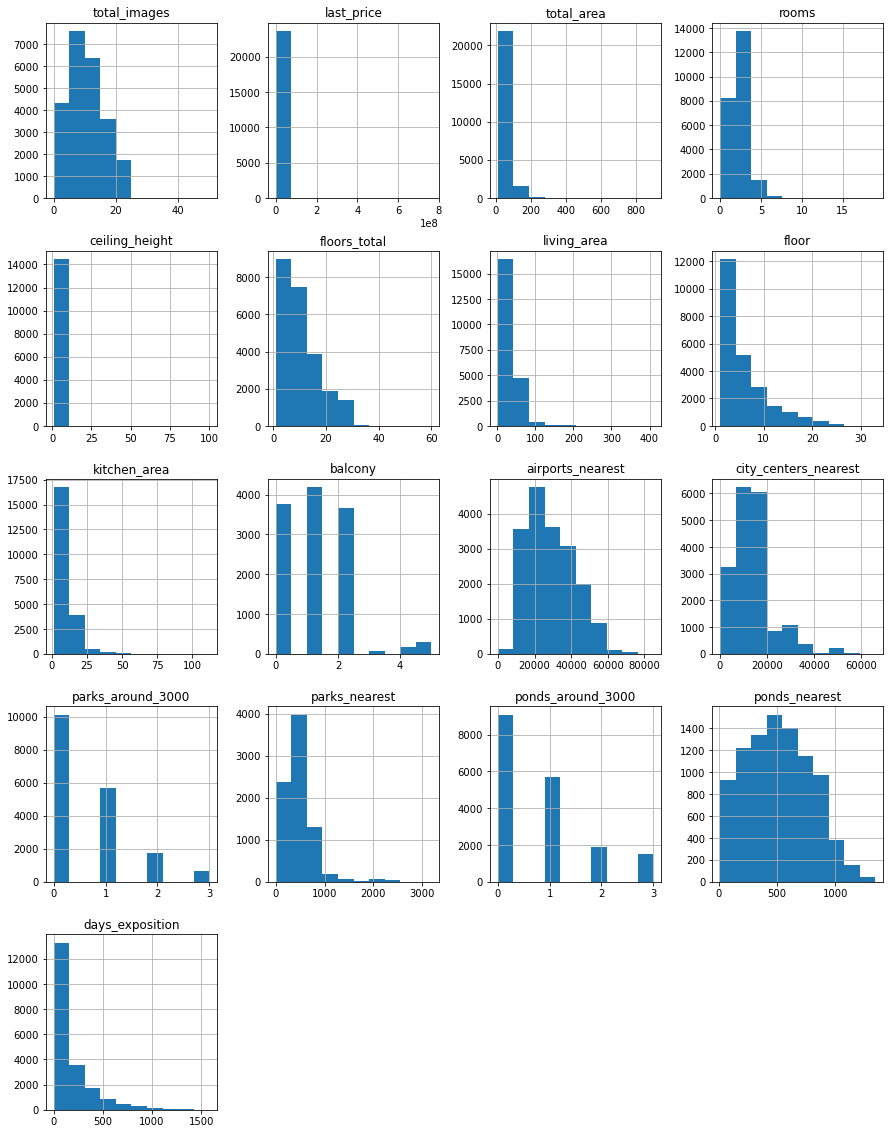

In [156]:
import matplotlib.pyplot as plt
data.hist(figsize=(15,20));
plt.show()

### Предобработка данных

**Выводим количество пропущенных значений в каждом столбце**

In [157]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Проверим количество пропусков в %**

In [158]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


*В 14 столбцах обнаружены пропущенные значения* 

**Проанализируем столбец ceiling_height. Выведем уникальные значения в этом столбце.**

In [159]:
data['ceiling_height'].unique() 


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

*Обнаружены аномальные значения. Такие как: 25.0м, 32.0м итд. Логично предположить что при заполнении данных неправильно выставлена точка. Следующим кодом обработаем эти аномалии. А значения, которые могут быть завышены или занижены 5.2м, 8.0м, 1.2м, 8.3м, 14.0м, 6.0м, 10.3м, 100.0м, 1.0м оставим как есть. Их не будем трогать.*

**Методом .replace меняем значения в столбце ceiling_height**

In [160]:
data['ceiling_height'] = data['ceiling_height'].replace({25.0: 2.5, 32.0: 3.2, 27.0: 2.7, 24.0: 2.4, 26.0: 2.6, 20.0: 2.0, 22.6: 2.26, 27.5: 2.75})

**Посчитаем медиану ceiling_height и сохраним его в переменной**

In [161]:
ceiling_height_median = data['ceiling_height'].median() 
ceiling_height_median


2.65

**Медианное значение вполне себе вменяемое и подходит для заполнения пропусков в столбце. Выбрал медиану, потому что имеются выбросы в значениях.**

In [162]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median) 

**В пропусках на столбце floors_total логичную замену предложить невозможно, поэтому я их заглушу значением 'unknown'**

In [163]:
data['floors_total'] = data['floors_total'].fillna('unknown')

**Пропуски в столбце living_area можно заполнить рассчитав медианное значение отношение жилой площади к общей площади по следующей формуле:  
Доля жилой площади = Жилая площадь / Общая площадь**

In [164]:
#создал новую переменную, где включил медианное значение доли жилой площади
living_area_percent_median = (data['living_area']/data['total_area']).median()
#далее заполняю пропуски в столбце living_area 
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area']*living_area_percent_median
#проверяем, заполнились ли пропуски
data['living_area'].isna().sum()

0

**Пропуски в столбце kitchen_area заполним аналогичным образом. Берем также медиану.**

In [165]:
#создал новую переменную, где включил медианное значение доли площади кухни
kitchen_area_percent_median = (data['kitchen_area']/data['total_area']).median()
#далее заполняю пропуски в столбце kitchen_area 
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area']*kitchen_area_percent_median
#проверяем, заполнились ли пропуски
data['kitchen_area'].isna().sum()

0

**Заполнение пропусков в столбце days_exposition. Столбец days_exposition содержит информацию: сколько дней было размещено объявление (от публикации до снятия). Логично предположить то что значение NaN появилось при выгрузке данных, и означает то что квартира все еще продается и объявление актуальное. Поэтому думаю заполнить пропуски любым другим каким-нибудь значением, например 0. Но для начала проверим есть ли значение 0 в столбце, если нет, то пропуски заполним этим значением.**

In [166]:
data.query('days_exposition == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


*Значение 0 в столбце отсутствует. Я заполню пропуски этим значением, это будет как бы маркером и будет означать то что квартира все еще продается.*

In [167]:
data['days_exposition'] = data['days_exposition'].fillna(0)


**Пропуски в столбце balcony заполним по рекомендациям в задании: например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.**

In [168]:
data['balcony'] = data['balcony'].fillna(0)

**Пропуски в столбце city_сenters_nearest попробуем заполнить медианным значением по каждому населенному пункту. Вычислим медиану для каждого населенного пункта.**

In [169]:
city_сenters_nearest_median = data.groupby('locality_name')['city_centers_nearest'].agg('median')
city_сenters_nearest_median.isna().sum()


336

*Для 336 населенных пунктов не удалось подсчитать медиану. Это говорит о том что заполнение пропусков медианным значением не подходит. Заполним пропуски в столбце условным маркером 55555, но для начала проверим есть ли такое значение в столбце.*

In [170]:
data.query('city_centers_nearest == 55555')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


*Значение 55555 в столбце отсутствует. Заменим пропуски в этом столбце значением 55555.*

In [171]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(55555)

**На пропусках в столбце locality_name поставим заглушку unknown.**

In [172]:
data['locality_name'] = data['locality_name'].fillna('Unknown')


**Заполнение пропусков в столбце is_apartment. Если пользователь не указал, то скорее всего это не аппартаменты.**

In [173]:
#посчитаем общее количество пропусков в столбце
data['is_apartment'].isna().sum()

20924

In [174]:
#выведем уникальные значения в столбце
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [175]:
#заполняем пропуски в столбце значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

**Заполнение пропусков в столбцах parks_around_3000 и ponds_around_3000**

In [176]:
#выведем уникальные значения в столбце 'parks_around_3000' 
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

**Вместо пропущенных значений поставлю 0. Также, если пользователь не указал, то скорее всего их нет.**

In [177]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

**Аналогично также сделаем со столбцом ponds_around_3000**

In [178]:
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [179]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)


**Меняю тип данных в столбцах для удобства дальнейшего анализа**


In [180]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

**В столбце locality_name решил оставить только название населенных пунктов и сохранил их в отдельный столбец.**

In [181]:
def word_capital(words):
    for word in words.split():
        if word[0].upper() in word:
               return word
 
data['locality_only_name'] = data['locality_name'].apply(word_capital)
 
#проверяем, получилось ли убрать 
data['locality_only_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'Красное',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Александровская', 'Лопухинка', '

**Посчитаем сколько дубликатов имеется**

In [182]:
data.duplicated().sum()

0

*Дубликатов не имеется*

In [183]:
#выведем основную информацию еще раз
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  int32  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  object 
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

*Основные действия по предобработке данных сделаны, теперь можно приступить к следующему этапу*


### Добавление новых столбцов

**Создаем столбец с ценой одного квадратного метра. Для этого воспользуемся формулой:  
Цена одного квадратного метра = стоимость / общую площадь**

In [184]:
#результат сохраню в новом столбце price_one_square_meter
data['price_one_square_meter'] = data['last_price']/ data['total_area']

**Создаем новые столбцы:  
День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)  
Месяц публикации объявления  
Год публикации объявления**

In [185]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [186]:
#преобразую столбец first_day_exposition к типу данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%S:%M:%H')
#cоздаю столбец год публикации
data['year'] = data['first_day_exposition'].dt.year 
#создаю столбец месяц публикации
data['month'] = data['first_day_exposition'].dt.month 
#создаю столбец день публикации
data['day'] = data['first_day_exposition'].dt.weekday 

**Создаю столбец тип этажа квартиры (значения — «первый», «последний», «другой»):  
Если значение floor=1, то "первый"  
Если значение floor=floors_total, то "последний"  
В остальных случаях, "другой"**

In [187]:
#объявляю функцию set_floor_type которая установит "тип этажа" для каждой квартиры
def set_floor_type(row):
#переменная 'floor' равна этажу квартиры    
    floor = row['floor'] 
#переменная 'total' равна сколько всего этажей в доме    
    total = row['floors_total']  
    if floor == 1:               
        floor = 'Первый этаж'    
        return floor             
    elif floor == total:         
        floor = 'Последний этаж' 
        return floor            
    else:                       
        floor = 'Другой этаж'    
        return floor             


#к датафрейму data применяю функцию set_floor_type 
data['floor_type'] = data.apply(set_floor_type, axis=1)
#проверяем
data['floor_type'].head()

0    Другой этаж
1    Первый этаж
2    Другой этаж
3    Другой этаж
4    Другой этаж
Name: floor_type, dtype: object

**Создаем столбец: расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).**

In [188]:
#в новый столбец city_centers_nearest_km сохраню результат вычислений
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).astype(int)

### Исследовательский анализ данных

**Изучаем параметр "общая площадь"**

*Для детального изучения данного параметра необходимо категоризировать квартиры по размеру общей площади.
Тип площади:    
Очень маленькая: 0-20%  
Маленькая: 21-40%  
Средняя: 41-60%  
Большая: 61-80%  
Очень большая: 81-100%* 

In [189]:
#применяю quantile с шагом 20%
data['total_area'].quantile([.20, .40, .60, .80]) 

0.200   37.000
0.400   46.000
0.600   58.000
0.800   75.000
Name: total_area, dtype: float64

*Категоризация будет по таким параметрам:  
<=37 - очень маленькие  
37<total_area<=46 - маленькие  
46<total_area<=58 - средние  
58<total_area<=75 - большие  
75> - очень большие*

**Создаю новый столбец в датафрейме, где будет указана категория квартиры по площади**

In [190]:
#объявляю функцию set_area_type
def set_area_type(row):       
    area = row['total_area']  #переменная area равна значению из столбца total_area
    if area <= 37:            
        return 'Очень маленькая'  
    if 37<area<=46:  
        return 'Маленькая'
    if 46<area<=58:
        return 'Средняя'
    if 58<area<=75:
        return 'Большая'
    if area > 75:
        return 'Очень большая'
    else:                                
        return 'Нет данных'              
#к датафрейму data применяю функцию set_floor_type    
data['area_type'] = data.apply(set_area_type, axis=1) 
#проверяем
data['area_type']

0          Очень большая
1              Маленькая
2                Средняя
3          Очень большая
4          Очень большая
              ...       
23694      Очень большая
23695            Большая
23696            Средняя
23697      Очень большая
23698    Очень маленькая
Name: area_type, Length: 23699, dtype: object

**Создаю сводную таблицу для построения графика по категориям и отсортирую по убыванию.**

                 total_area
area_type                  
Маленькая              5150
Очень маленькая        4811
Большая                4678
Средняя                4542
Очень большая          4518


count   23699.000
mean       60.121
std        35.666
min        12.000
25%        40.000
50%        52.000
75%        69.000
max       900.000
Name: total_area, dtype: float64

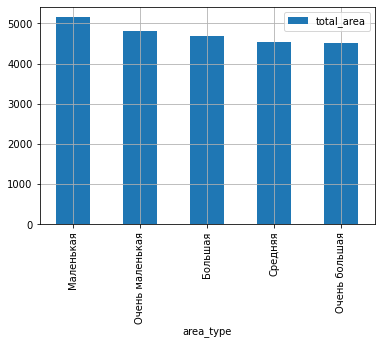

In [191]:
area_type_data = (data.pivot_table(index='area_type', values='total_area', aggfunc='count').sort_values(by='total_area', ascending = False))
print(area_type_data)
area_type_data.plot(kind='bar', grid=True)
data['total_area'].describe() #применю метод describe для анализа

*Распределение квартир по типу площади достаточно равномерное. Количество квартир с маленькой площадью самое больше = 5150 квартир. Самое малое количество квартир с очень большой площадью = 4518 квартир. 
Самая маленькая площадь составляет всего 12м², а максимальная = 900м². Средняя площадь равна 60м², а медианное значение равно 52м².*

**Для определения выбросов построю диаграмму размаха**

<AxesSubplot:>

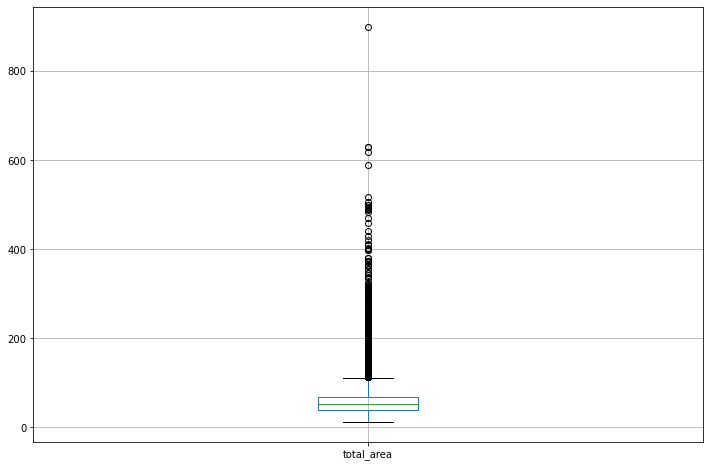

In [192]:
data.boxplot(column='total_area', figsize=(12, 8))

*На диаграмме размаха видно что выбросы начинаются ориетировочно от 110м², после которой значение "общая площадь" является выбросом и от таких значений можно избавляться.*

In [193]:
#решил вывести топ10 самых больших и самых маленьких квартир по общей площади
print('топ 10 самых больших квартир')
print(data['total_area'].sort_values(ascending=False).head(10))
print('------------------------------------------')
print('топ 10 самых маленьких квартир')
print(data['total_area'].sort_values().head(10))

топ 10 самых больших квартир
19540    900
3117     631
12859    631
15651    618
5358     590
4237     517
8018     507
5893     500
15016    500
12401    495
Name: total_area, dtype: int32
------------------------------------------
топ 10 самых маленьких квартир
19904    12
19807    13
19546    13
19558    13
17961    13
19642    14
12040    15
16949    15
8886     15
9412     16
Name: total_area, dtype: int32


**Изучаем параметр "жилая площадь"**

*Проведем такую же процедуру как с общей площадью*

In [194]:
data['living_area'].quantile([.20, .40, .60, .80]) 

0.200   18.000
0.400   27.400
0.600   33.400
0.800   45.000
Name: living_area, dtype: float64

*Категоризация будет по таким параметрам:  
<=18 - очень маленькие  
18<living_area<=27,4 - маленькие  
27,4<living_area<=33,4 - средние  
33,4<living_area<=45 - большие  
45> - очень большие*  

In [195]:
#объявляю функцию set_area_type
def set_area_type(row):       
    area = row['living_area']  #переменная area равна значению из столбца living_area
    if area <= 18:            
        return 'Очень маленькая'  
    if 18<area<=27.4:  
        return 'Маленькая'
    if 27.4<area<=33.4:
        return 'Средняя'
    if 33.4<area<=45:
        return 'Большая'
    if area > 45:
        return 'Очень большая'
    else:                                
        return 'Нет данных'              
#к датафрейму data применяю функцию set_floor_type    
data['area_type'] = data.apply(set_area_type, axis=1) 
#проверяем
data['area_type']

0          Очень большая
1              Маленькая
2                Большая
3          Очень большая
4                Средняя
              ...       
23694      Очень большая
23695            Большая
23696            Средняя
23697            Большая
23698    Очень маленькая
Name: area_type, Length: 23699, dtype: object

                 living_area
area_type                   
Очень маленькая         5151
Большая                 4847
Средняя                 4730
Очень большая           4628
Маленькая               4343


count   23699.000
mean       34.578
std        22.341
min         2.000
25%        19.000
50%        30.000
75%        42.100
max       409.700
Name: living_area, dtype: float64

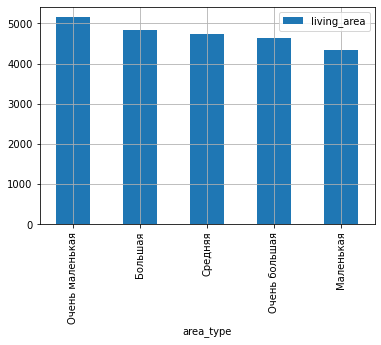

In [196]:
area_type_data = (data.pivot_table(index='area_type', values='living_area', aggfunc='count').sort_values(by='living_area', ascending = False))
print(area_type_data)
area_type_data.plot(kind='bar', grid=True)
data['living_area'].describe() #применю метод describe для анализа

*Распределение квартир по типу жилой площади тоже достаточно равномерное. Количество квартир с очень маленькой жилой площадью самое больше = 5151 квартир. Самое малое количество квартир с маленькой жилой площадью = 4343 квартир. 
Самая маленькая площадь составляет 2м², а максимальная = 409м². Средняя площадь равна 34.5м², а медианное значение равно 30м².*

<AxesSubplot:>

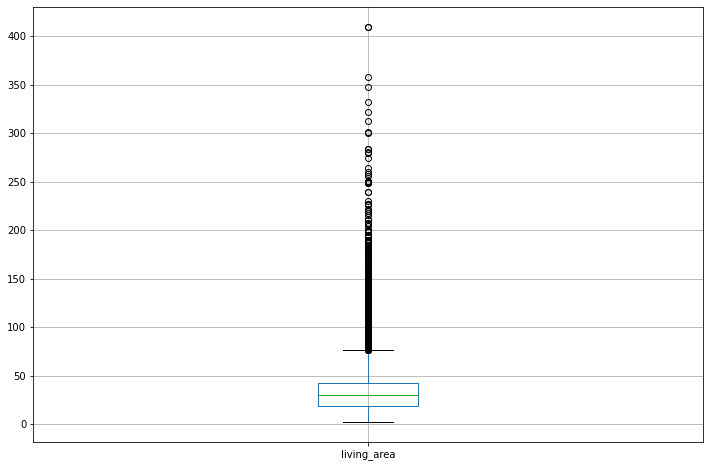

In [197]:
#построим диаграмму размаха для определения выбросов
data.boxplot(column='living_area', figsize=(12, 8))

*На диаграмме размаха видно что выбросы начинаются ориетировочно от 75м², после которой значение "жилая площадь" является выбросом и от таких значений можно избавляться.*

In [198]:
#также выведу топ10 самых больших и самых маленьких квартир по общей площади
print('топ 10 самых больших квартир по жилой площади')
print(data['living_area'].sort_values(ascending=False).head(10))
print('------------------------------------------')
print('топ 10 самых маленьких квартир по жилой площади')
print(data['living_area'].sort_values().head(10))

топ 10 самых больших квартир по жилой площади
19540   409.700
5358    409.000
3117    358.320
12401   347.500
4237    332.000
12859   322.300
660     312.500
8018    301.500
14088   300.000
15016   283.930
Name: living_area, dtype: float64
------------------------------------------
топ 10 самых маленьких квартир по жилой площади
13915   2.000
21758   2.000
23574   3.000
3242    3.000
17582   5.000
21943   5.400
16431   6.000
19251   6.500
17961   7.382
19546   7.382
Name: living_area, dtype: float64


**Изучаем параметр "площадь кухни"**

*Проведем такую же процедуру как с общей площадью и жилой площадью*

In [199]:
data['kitchen_area'].quantile([.20, .40, .60, .80]) 

0.200    6.500
0.400    8.300
0.600   10.000
0.800   12.800
Name: kitchen_area, dtype: float64

*Категоризация будет по таким параметрам:  
<=6,5 - очень маленькие  
6,5<kitchen_area<=8,3 - маленькие  
8,3<kitchen_area<=10 - средние  
10<kitchen_area<=12,8 - большие  
12,8> - очень большие*

In [200]:
#объявляю функцию set_area_type
def set_area_type(row):       
    area = row['kitchen_area']  #переменная area равна значению из столбца living_area
    if area <= 6.5:            
        return 'Очень маленькая'  
    if 6.5<area<=8.3:  
        return 'Маленькая'
    if 8.3<area<=10:
        return 'Средняя'
    if 10<area<=12.8:
        return 'Большая'
    if area > 12.8:
        return 'Очень большая'
    else:                                
        return 'Нет данных'              
#к датафрейму data применяю функцию set_floor_type    
data['area_type'] = data.apply(set_area_type, axis=1) 
#проверяем
data['area_type']

0        Очень большая
1              Большая
2            Маленькая
3        Очень большая
4        Очень большая
             ...      
23694    Очень большая
23695          Средняя
23696          Средняя
23697    Очень большая
23698          Средняя
Name: area_type, Length: 23699, dtype: object

                 kitchen_area
area_type                    
Средняя                  4898
Маленькая                4792
Очень маленькая          4781
Очень большая            4706
Большая                  4522


count   23699.000
mean       10.491
std         6.029
min         1.300
25%         7.000
50%         9.000
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64

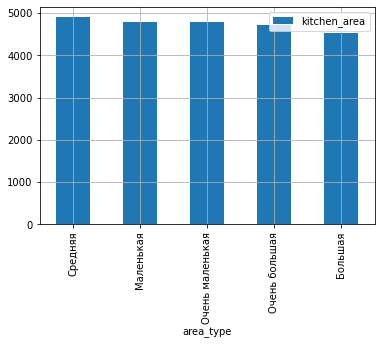

In [201]:
area_type_data = (data.pivot_table(index='area_type', values='kitchen_area', aggfunc='count').sort_values(by='kitchen_area', ascending = False))
print(area_type_data)
area_type_data.plot(kind='bar', grid=True)
data['kitchen_area'].describe() #применю метод describe для анализа

*Распределение квартир по типу площади кухни тоже достаточно равномерное. Количество квартир с средней кухней самое больше = 4898 квартир. Самое малое количество квартир с большой кухней = 4522 квартир. 
Самая маленькая площадь составляет 1,3м², а максимальная = 112м². Средняя площадь равна 10.5м², а медианное значение равно 9м².*

<AxesSubplot:>

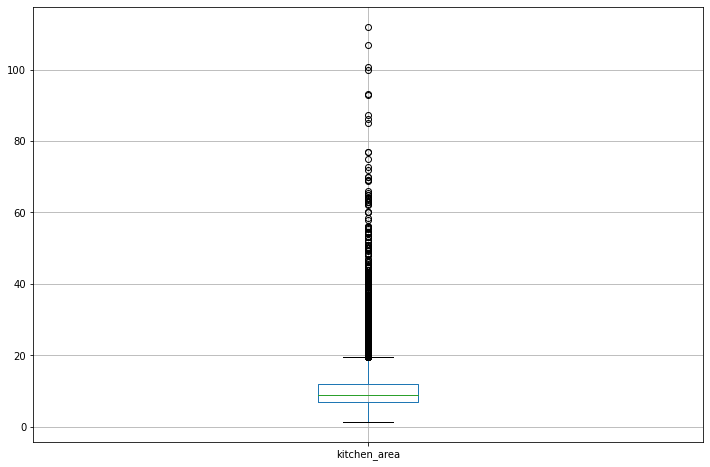

In [202]:
#построим диаграмму размаха для определения выбросов
data.boxplot(column='kitchen_area', figsize=(12, 8))

*На диаграмме размаха видно что выбросы начинаются ориетировочно от 19м², после которой значение "площадь кухни" является выбросом и от таких значений можно избавляться.*

In [203]:
#также выведу топ10 самых больших и самых маленьких квартир по площади кухни
print('топ 10 самых больших квартир по по площади кухни')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
print('------------------------------------------')
print('топ 10 самых маленьких квартир по площади кухни')
print(data['kitchen_area'].sort_values().head(10))

топ 10 самых больших квартир по по площади кухни
19540   112.000
20215   107.000
2489    100.700
5358    100.000
16239    93.200
16797    93.000
10867    87.200
15016    86.207
9826     85.190
492      77.000
Name: kitchen_area, dtype: float64
------------------------------------------
топ 10 самых маленьких квартир по площади кухни
20217   1.300
16367   2.000
11033   2.000
9138    2.000
906     2.000
19642   2.000
6262    2.000
21419   2.000
19904   2.069
19546   2.241
Name: kitchen_area, dtype: float64


**Изучаем параметр "last_price"**

In [204]:
#избавляемся от значений в столбце last_price, где цена указана в нечитабельном виде (например 1.192433e+08)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#выведем основные данные по столбцу с помощью метода .describe()
data['last_price'].describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

*В столбце last_price имеются аномальные большие и маленькие значения, которые необходимо отфильтровать. Чтобы проанализировать значения я воспользуюсь методами .hist() и .boxplot()*

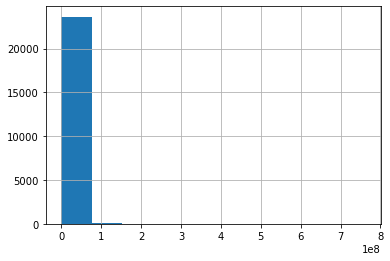

<AxesSubplot:>

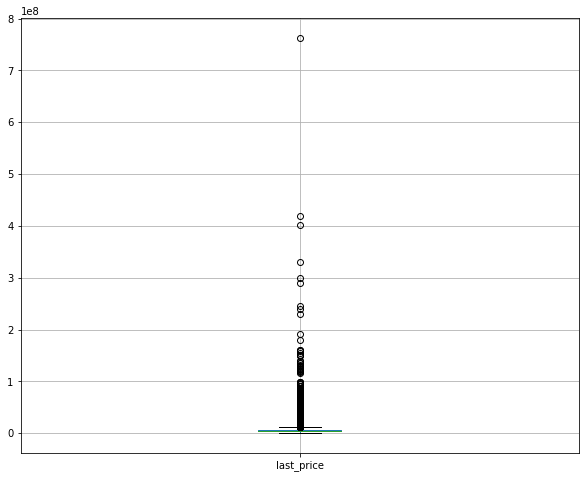

In [205]:
import matplotlib.pyplot as plt

#построим гистограмму
data['last_price'].hist()
plt.show()
#построим диаграмму размаха для определения выбросов
data.boxplot(column='last_price', figsize=(10, 8))


(0.0, 13000000.0)

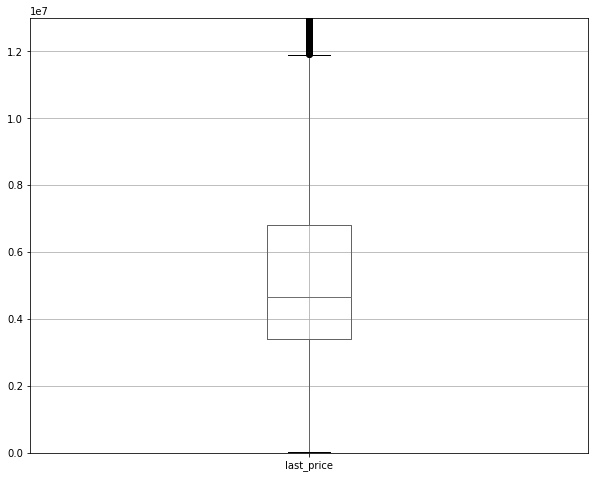

In [206]:
data.boxplot(column='last_price', figsize=(10, 8))
#отфильтруем значения свыше 13млн рублей 
plt.ylim(0,13000000)


*Видно что имеются выбросы в районе более 11.9 млн. рублей*

In [207]:
#узнаем количество квартир дороже 11.9млн рублей
print(len(data.query('last_price > 11900000')))

2034


*Проанализировав полученные результаты, можно выделить границы отсечения выбросов и аномальных значений: больше 11,9 млн рублей*

**Изучаем параметр "rooms"**

In [208]:
#выведем основные параметры столбца rooms
data['rooms'].describe()

count   23699.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

<AxesSubplot:>

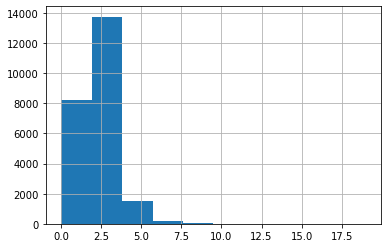

In [209]:
#построим гистограмму
data['rooms'].hist()

<AxesSubplot:xlabel='rooms'>

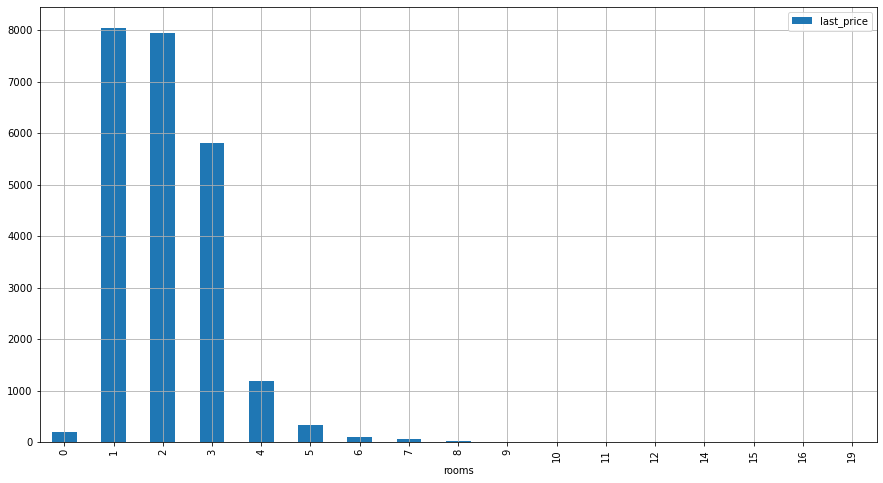

In [210]:
#в новой переменной rooms сохраню сводную таблицу, в котором будут количество квартир для каждого вида (1комн, 2комн, 3комн итд)
rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='count')
#нарисую столбчатую  диаграмму
rooms.plot(y='last_price', kind='bar', figsize=(15, 8), grid=True)

In [211]:
#создаю столбец, где включаю долю от общего количества квартир для каждого вида
rooms['percent'] = (rooms['last_price'] / rooms['last_price'].sum()) * 100
rooms

,last_price,percent
rooms,,
0,197,0.831
1,8047,33.955
2,7940,33.504
3,5814,24.533
4,1180,4.979
5,326,1.376
6,105,0.443
7,59,0.249
8,12,0.051


In [212]:
#посмтотрим общее количество и долю от общего количество квартир, где комнат 5 и более
rooms.query('rooms>5').sum()

last_price   195.000
percent        0.823
dtype: float64

Text(0.5, 1.0, 'Диаграмма размаха')

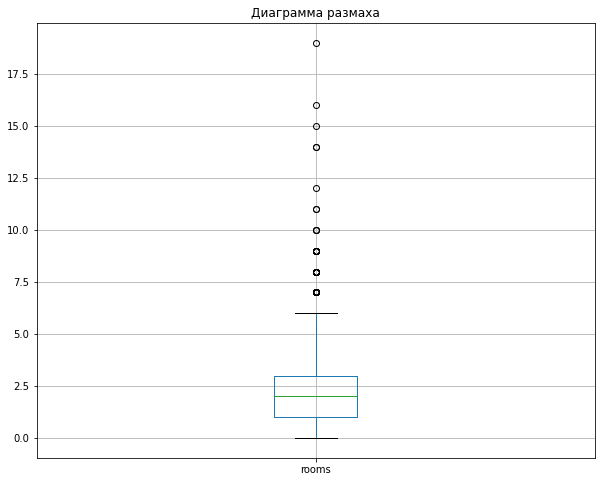

In [213]:
#строю диаграмму размаха для определения выбросов
data.boxplot(column='rooms', figsize=(10, 8),)
plt.title('Диаграмма размаха')

*Квартиры с 1 и 2 комнатами самые популярные (33.955% и 33.504 соответственно)  
Квартиры с 0 комнатами (студии, общаги, койки) - занимают 0,831% от общего количества   
Наибольшее количество объявлений с продажей 1 комнатных квартир  
Топ 3 самых популярных видов квартир:1, 2, 3 комнатные квартиры  
Квартиры с количеством комнат более 5 занимают менее 1% от общего количества объявлений  
Видно что имеются выбросы в районе более 6 комнат*  

**Изучаем параметр "высота потолков"**

In [214]:
data['ceiling_height'].describe()

count   23699.000
mean        2.703
std         0.679
min         1.000
25%         2.600
50%         2.650
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64

,ceiling_height
rooms,
15,3.500
11,3.415
7,3.300
10,3.150
9,3.100
16,3.000
6,3.000
5,2.930
14,2.905


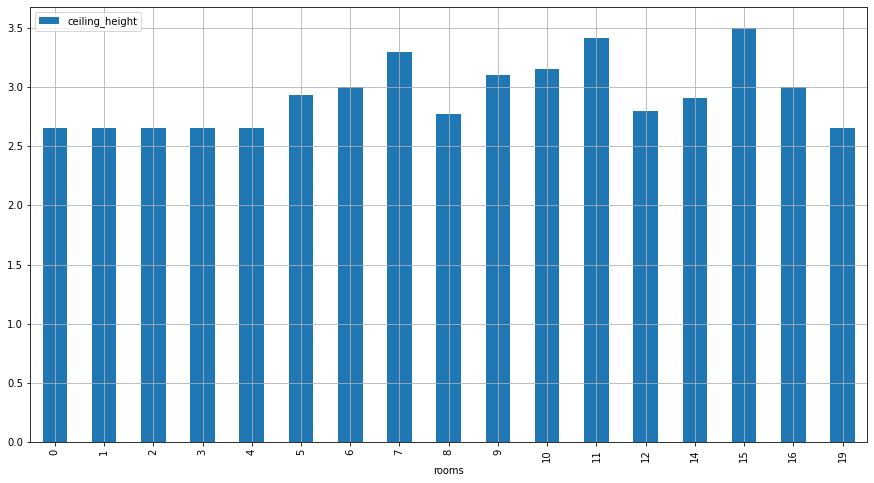

In [215]:
#в новой переменной rooms сохраню сводную таблицу, в котором будут количество квартир для каждого вида (1комн, 2комн, 3комн итд)
ceiling_height = data.pivot_table(index='rooms', values='ceiling_height', aggfunc='median')
#нарисую столбчатую  диаграмму
ceiling_height.plot(y='ceiling_height', kind='bar', figsize=(15, 8), grid=True)
#остортируем данные по убыванию
ceiling_height.sort_values(by='ceiling_height',ascending=False)

*Самые высокие потолки у 15 комнатной квартиры  
Самые низкие потолки у: 0, 1, 4, 3, 2 комнатных квартир  
Медианное значение высоты потолка равно 2.65м  
Встречаются аномальные значения: 100м, 1м что считаю невозможным.*  

**Изучаем параметр "floor"**

In [216]:
#выводим основную числовую информацию
data['floor'].describe()

count   23699.000
mean        5.892
std         4.885
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

<AxesSubplot:>

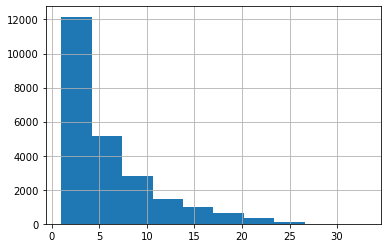

In [217]:
#строим гистограмму
data['floor'].hist()

<AxesSubplot:>

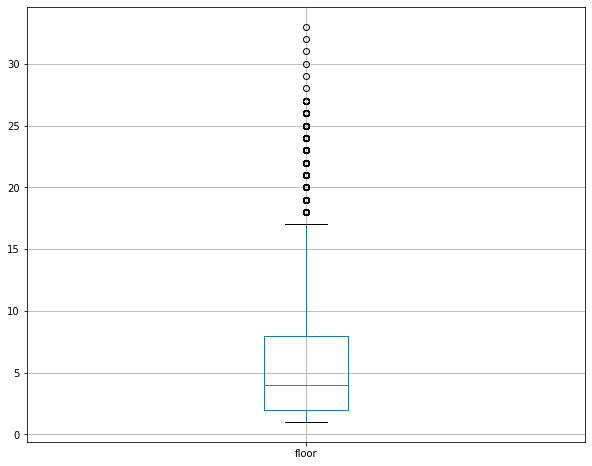

In [218]:
#строю диаграмму размаха
data.boxplot(column='floor', figsize=(10, 8))


*Проанализировав полученные результаты, можно выделить границы отсечения выбросов и аномальных значений: больше 17 комнат*

<AxesSubplot:xlabel='floor'>

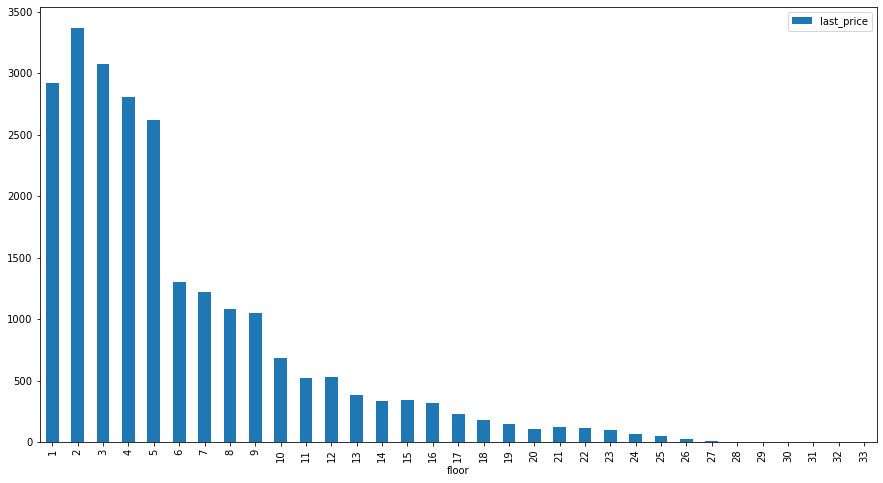

In [219]:
#создаю сводную таблицу для построения столбчатой диаграммы
floor = data.pivot_table(index='floor', values='last_price', aggfunc='count')
#рисую столбчатую диаграмму
floor.plot(kind='bar', figsize=(15,8))

In [220]:
#остортирую в порядке убывания
floor.sort_values(by='last_price',ascending=False)
#создаю столбец, где будет доля от общего количества объявлений по каждой квартире
floor['percent'] = (floor['last_price']/floor['last_price'].sum())*100
floor

,last_price,percent
floor,,
1,2917,12.309
2,3368,14.212
3,3073,12.967
4,2804,11.832
5,2621,11.060
6,1305,5.507
7,1218,5.139
8,1083,4.570
9,1051,4.435


*Наибольшее количество квартир во втором этаже = 3368 шт.    
Квартиру, расположенные выше 17 этажа встречаются крайне редко  
Самое высокое расположение квартиры - 33 этаж  
Топ 5 квартир, это: 1, 2, 3, 4, 5 этажи.*

**Изучаем параметр "floor_type"**

<AxesSubplot:>

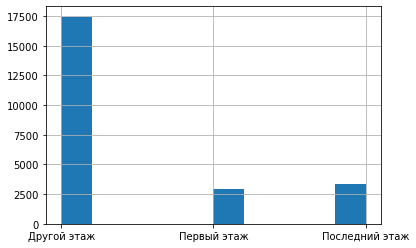

In [221]:
#построим гистрограмму
data['floor_type'].hist()

*Исходя из того что гистрограмма показывает, я думаю что этого достаточно для анализа столбца.  Самое большое количество объявлений - это квартиры расположенные в "другом этаже". "Другой этаж" - это у нас этажи, где включены все кроме первого и последнего этажа.*

**Изучаем параметр "день и месяц публикации объявления"**

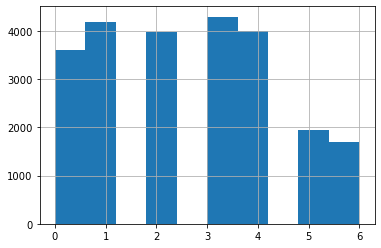

<AxesSubplot:>

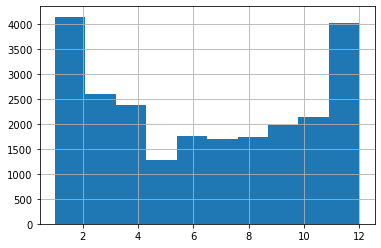

In [222]:
data['day'].hist()
plt.show()
data['month'].hist()

*Наибольшее количество объявлений выставляются по будням, в выходные дни в два раза меньше объявлений.  
Наибольшее количество объявлений выставляются на начало и конец года.*  



**Изучаем, как быстро продавались квартиры (столбец days_exposition).**

*Ранее я вместо пропущенных значений поставил значение 0, и оно будет означать то что квартира все еще продается и объявление актуальное.*

In [223]:
#выведем основные числовые данные по столбцу
data['days_exposition'].describe()

count   23699.000
mean      156.609
std       213.547
min         0.000
25%        22.000
50%        74.000
75%       199.000
max      1580.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

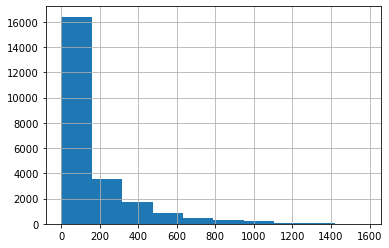

In [224]:
#построим гистограмму
data['days_exposition'].hist()

<AxesSubplot:>

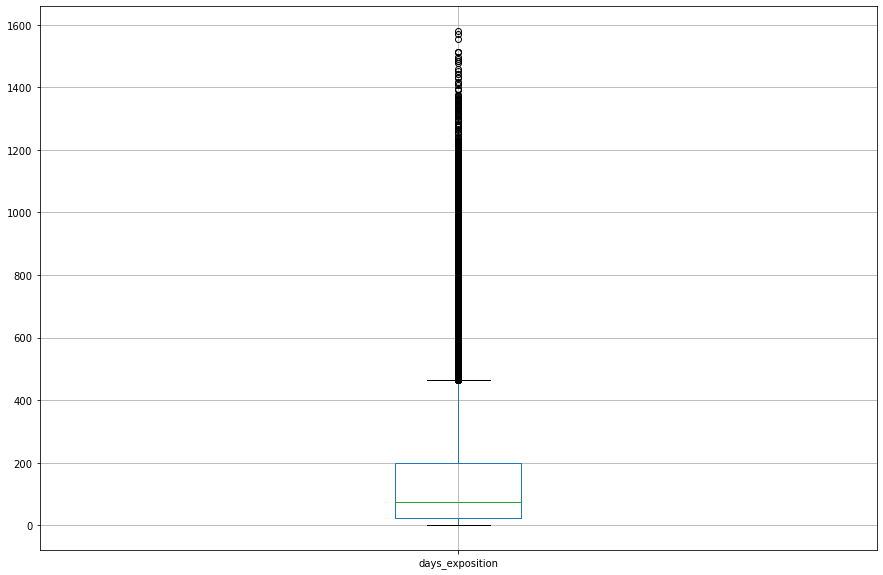

In [225]:
data.boxplot('days_exposition', figsize=(15, 10))


*Выбросы начинаются после 450 дней*

<AxesSubplot:xlabel='days_exposition'>

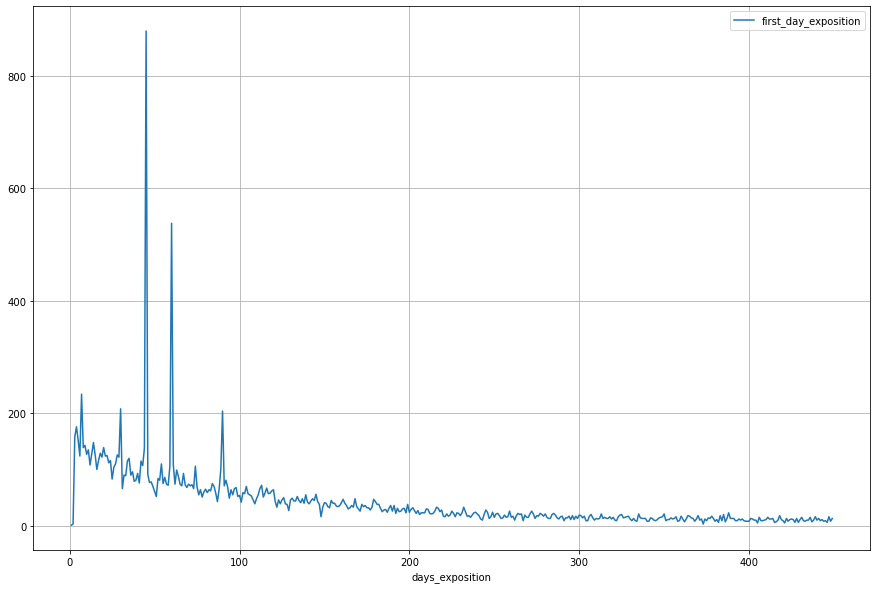

In [226]:
#создаю новый датафрейм с отфильтрованными данными. Значение 0 не беру и выбросы. 
days_exposition = data.query('0 < days_exposition < 450')
#создаю сводную таблицу для построения гистограммы
days_exposition = days_exposition.pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
#создаем гистограмму
days_exposition.plot(grid=True, figsize=(15, 10))


*Среднее значение продажи квартиры: 156 дней  
Медианное значение продажи квартиры: 74 дня  
Наибольшее число продаж: в районе 50 дней  
Слишком быстро продается: до 90 дней с момента публикации  
Слишком долго продается: после 90 дней с момента публикации*

**Изучение зависимости цены от общей площади**

In [227]:
#посчитаем коэффициент корреляции Пирсона между этими величинами
corr = data['last_price'].corr(data['total_area'])
#выведем на экран
corr

0.6536539818654252

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

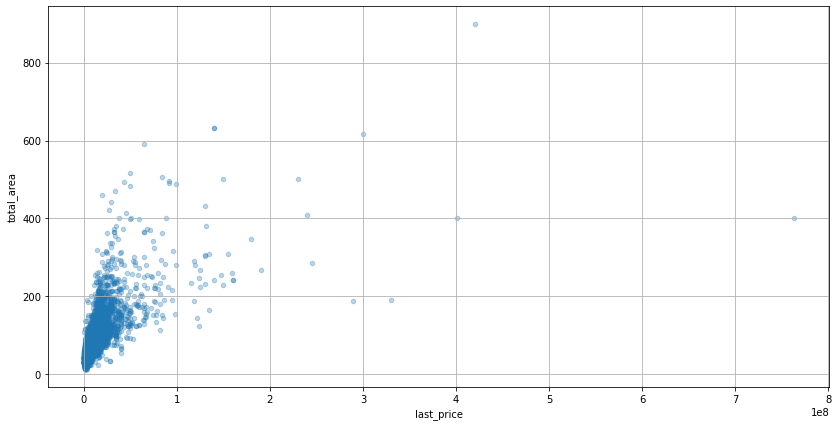

In [228]:
#построим диаграмму рассеяния
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(14, 7), sharex=False, grid=True, alpha=0.3)


*Коэффициент корреляции Пирсона равен 0,65, это говорит о том, что между значениями имеется прямая зависимость.*

**Изучение зависимости цены от жилой площади**

In [229]:
#посчитаем коэффициент корреляции Пирсона между этими величинами
corr = data['last_price'].corr(data['living_area'])
#выведем на экран
corr

0.5857245164413089

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

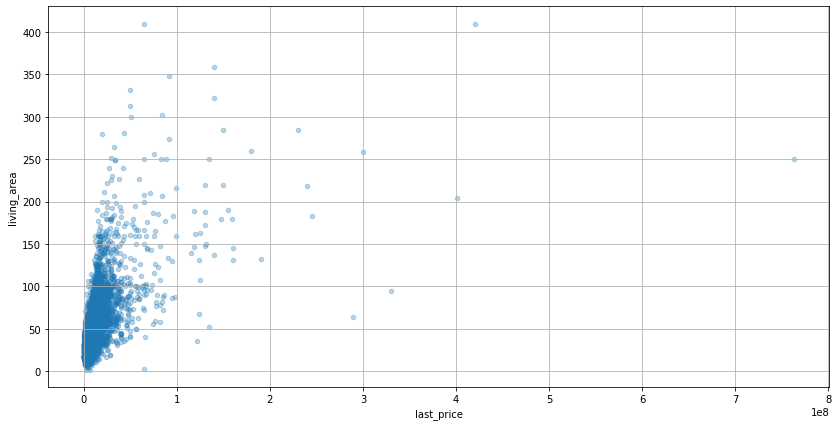

In [230]:
#построим диаграмму рассеяния
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(14, 7), sharex=False, grid=True, alpha=0.3)


*Коэффициент корреляции Пирсона равен 0.58, это говорит о том, что между значениями имеется прямая зависимость (не очень сильная)*

**Изучение зависимости цены от площади кухни**

In [231]:
#посчитаем коэффициент корреляции Пирсона между этими величинами
corr = data['last_price'].corr(data['kitchen_area'])
#выведем на экран
corr

0.513476048613208

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

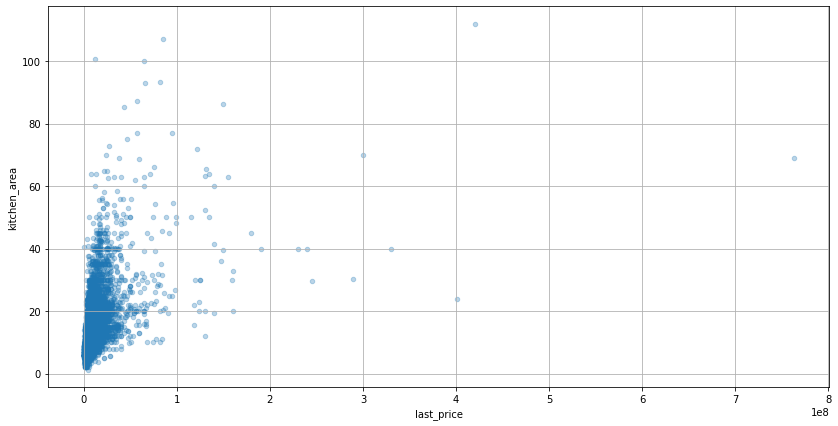

In [232]:
#построим диаграмму рассеяния
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(14, 7), sharex=False, grid=True, alpha=0.3)

*Коэффициент корреляции Пирсона равен 0.58, это говорит о том, что между значениями имеется прямая зависимость (не очень сильная)*

**Изучение зависимости цены от количества комнат**

*Для определения зависимости между этими значениями я построю столбчатую гистограмму для анализа.*

<AxesSubplot:ylabel='rooms'>

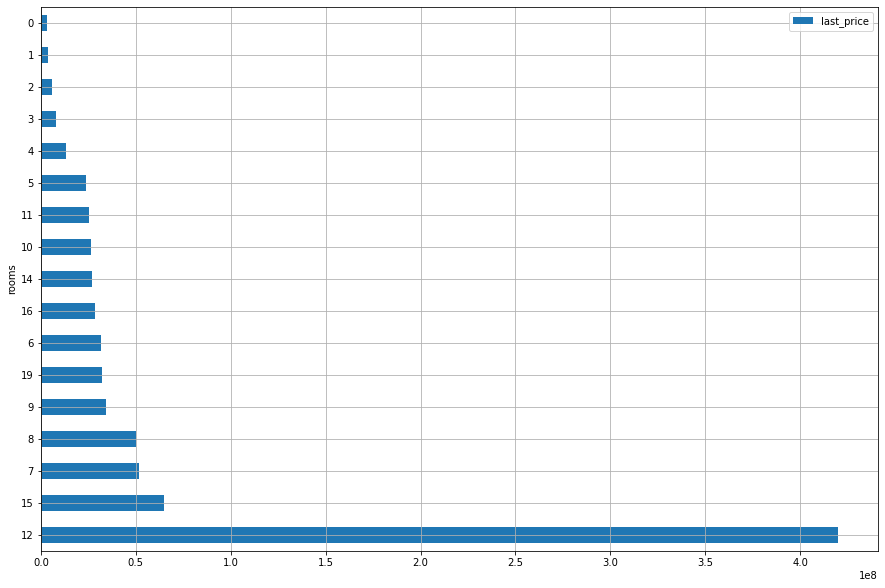

In [233]:
#создаю сводную таблицу для гистограммы
last_price_and_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
#остортирую в порядке убывания
last_price_and_rooms = last_price_and_rooms.sort_values(by='last_price', ascending=False)
#построю гистограмму 
last_price_and_rooms.plot(y='last_price', kind='barh', figsize=(15, 10), grid=True)


*По графику видно то что имеется прямая зависимость средней цены от количества комнат. С увеличением количества комнат увеличивается средняя цена.*

**Изучение зависимости цены от типа этажа**

*Для определения зависимости между этими значениями я построю столбчатую гистограмму, аналогичную предыдущему, для анализа*

<AxesSubplot:ylabel='floor_type'>

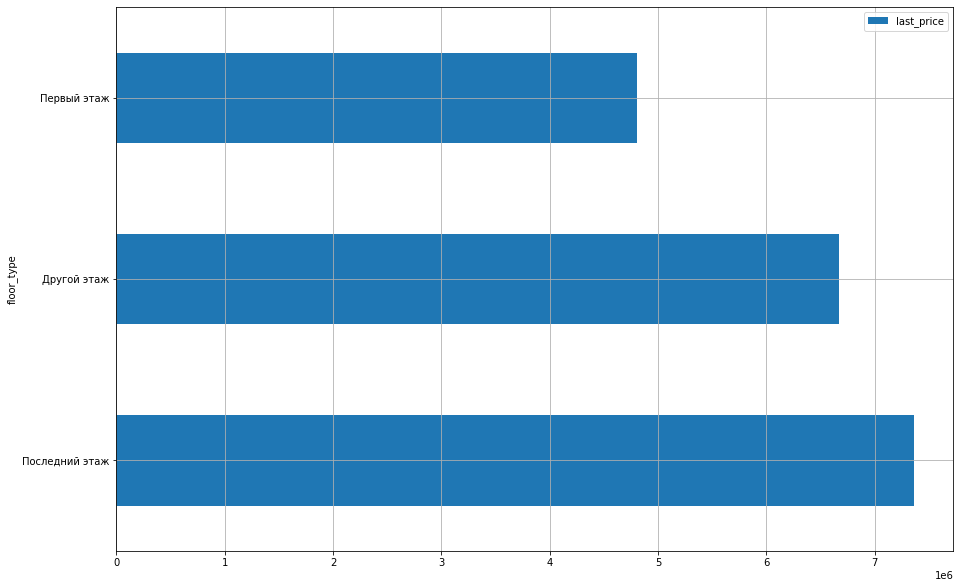

In [234]:
#создаю сводную таблицу для гистограммы
last_price_and_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
#остортирую в порядке убывания
last_price_and_floor_type = last_price_and_floor_type.sort_values(by='last_price', ascending=False)
#построю гистограмму 
last_price_and_floor_type.plot(y='last_price', kind='barh', figsize=(15, 10), grid=True)

*На графике видно то что квартиры, расположенные в последнем этаже имеют высокую цену чем другие. Можно сделать вывод, что имеется прямая зависимость между средней ценой и типом этажа квартиры*

**Изучение зависимости цены от даты размещения (день недели, месяц, год).**

*Также буду использовать столбчатую диаграмму для изучения зависимости между этими параметрами*

<AxesSubplot:ylabel='day'>

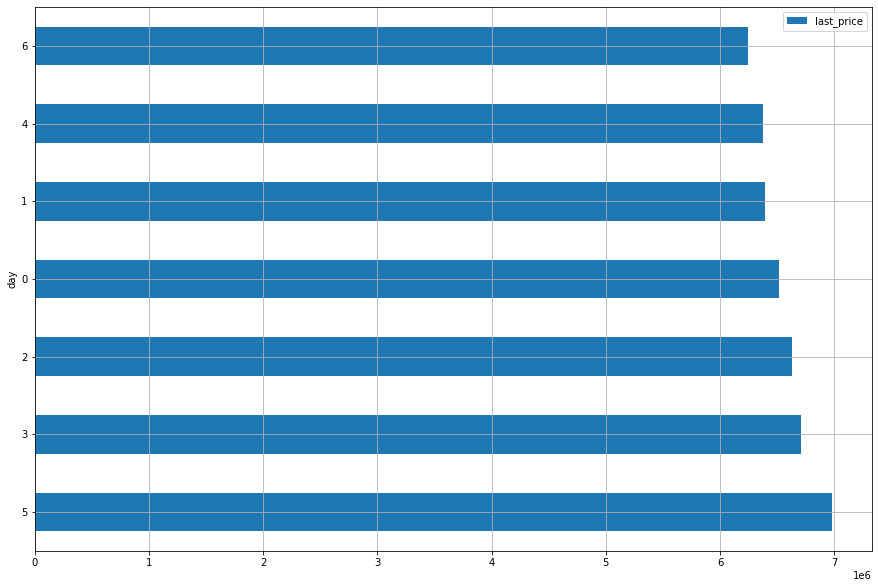

In [235]:
#создаю сводную таблицу для гистограммы
last_price_and_day = data.pivot_table(index = 'day', values = 'last_price', aggfunc= 'mean')
#остортирую в порядке убывания
last_price_and_day = last_price_and_day.sort_values(by='last_price', ascending=False)
#построю гистограмму 
last_price_and_day.plot(y='last_price', kind='barh', figsize=(15, 10), grid=True)

<AxesSubplot:ylabel='month'>

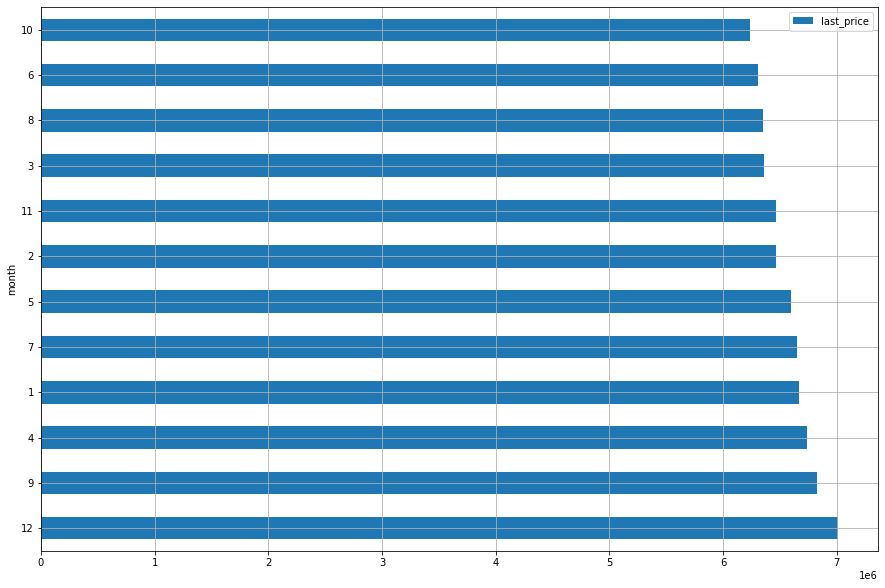

In [236]:
#создаю сводную таблицу для гистограммы
last_price_and_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc= 'mean')
#остортирую в порядке убывания
last_price_and_month = last_price_and_month.sort_values(by='last_price', ascending=False)
#построю гистограмму 
last_price_and_month.plot(y='last_price', kind='barh', figsize=(15, 10), grid=True)

<AxesSubplot:ylabel='year'>

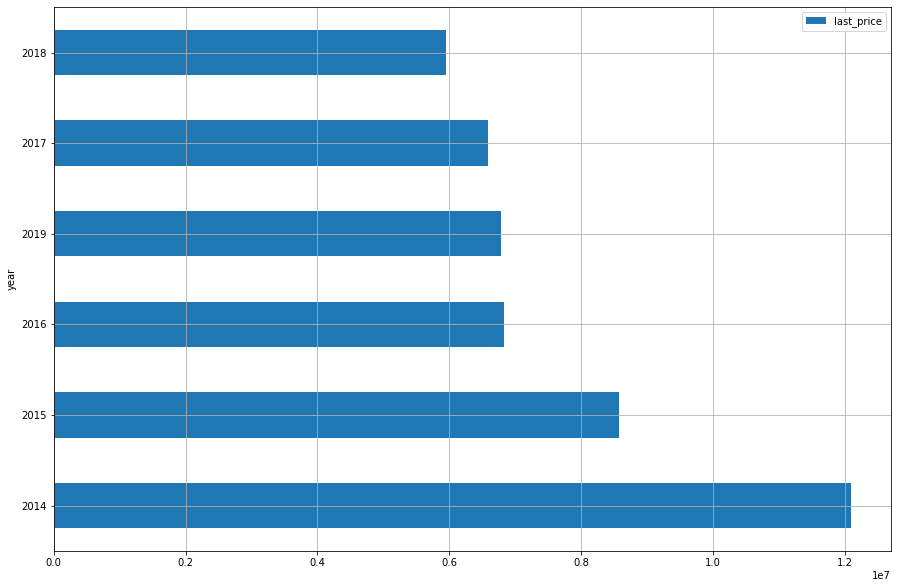

In [237]:
#создаю сводную таблицу для гистограммы
last_price_and_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc= 'mean')
#остортирую в порядке убывания
last_price_and_year = last_price_and_year.sort_values(by='last_price', ascending=False)
#построю гистограмму 
last_price_and_year.plot(y='last_price', kind='barh', figsize=(15, 10), grid=True)

*Анализ для день публикации и стоимости:
Максимальная средняя цена обнаружена в субботу, а минимальное - воскресенье. Я бы не сказал это прямой зависимостью.  
Анализ для месяца публикации и стоимости:
Максимальная средняя цена обнаружена в декабре, а минимальное - в октябре. Я бы не сказал это прямой зависимостью.  
Анализ для года публикации и стоимости:  В 2014 году средняя стоимость квартиры намного выше чем в остальные года. Думаю рост цен связана с тем что в этом году общее количество ИЖК и общая сумма намного выше чем в остальные года. Но это лишь мое предположение.*

In [238]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_only_name,price_one_square_meter,year,month,day,floor_type,city_centers_nearest_km,area_type
0,20,13000000,108,2019-03-07,3,2.700,16.000,51.000,8,False,...,755.000,0.000,Санкт-Петербург,120370.370,2019,3,3,Другой этаж,16,Очень большая
1,7,3350000,40,2018-12-04,1,2.650,11.000,18.600,1,False,...,NaN,81.000,Шушары,83750.000,2018,12,1,Первый этаж,18,Большая
2,10,5196000,56,2015-08-20,2,2.650,5.000,34.300,4,False,...,574.000,558.000,Санкт-Петербург,92785.714,2015,8,3,Другой этаж,13,Маленькая
3,0,64900000,159,2015-07-24,3,2.650,14.000,90.290,9,False,...,234.000,424.000,Санкт-Петербург,408176.101,2015,7,4,Другой этаж,6,Очень большая
4,2,10000000,100,2018-06-19,2,3.030,14.000,32.000,13,False,...,48.000,121.000,Санкт-Петербург,100000.000,2018,6,1,Другой этаж,8,Очень большая


<AxesSubplot:xlabel='total_area'>

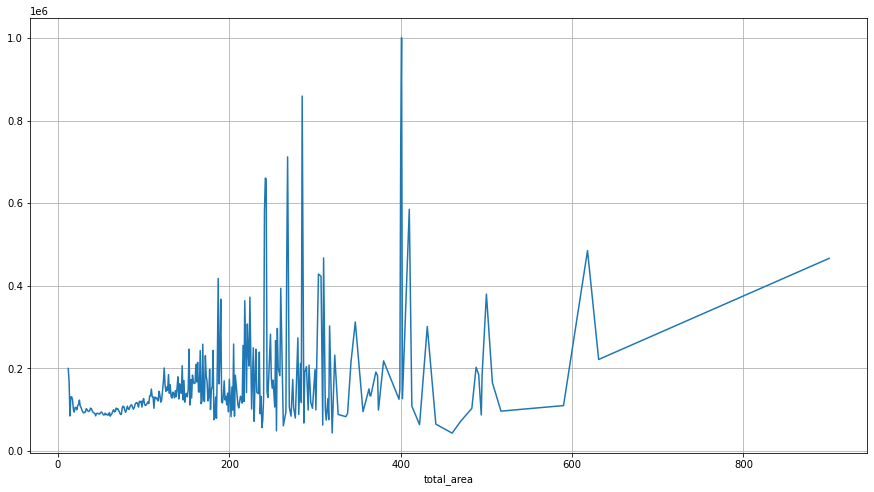

In [239]:
a = data.groupby('total_area')['price_one_square_meter'].agg('mean')

a.plot(x='total_area', y='price_one_square_meter', grid=True, figsize=(15, 8))

In [240]:
a.sort_values(ascending=False).head()

total_area
401   1000748.130
285    859649.123
400    740833.333
268    712201.493
242    661090.909
Name: price_one_square_meter, dtype: float64

*Резкие скачки цены одного квадратного метра наблюдаются на квартирах площадью от 240 до 400 м2. Топ 5 самых дорогих цен за квадратный метр у квартир с общей площадью 401, 285, 400, 268, 242.*

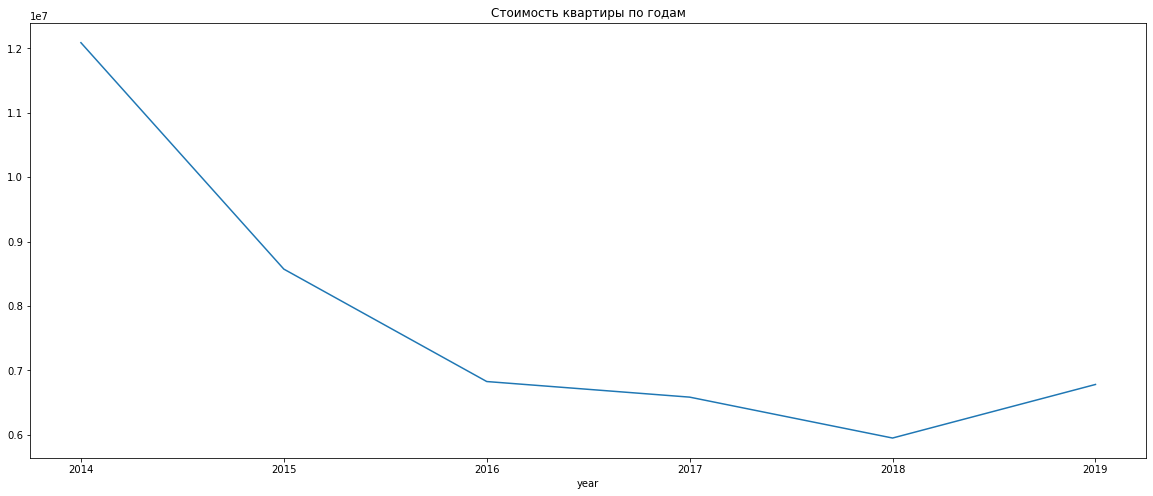

In [241]:
data.groupby('year')['last_price'].mean().plot(figsize = (20, 8))
plt.title('Стоимость квартиры по годам');

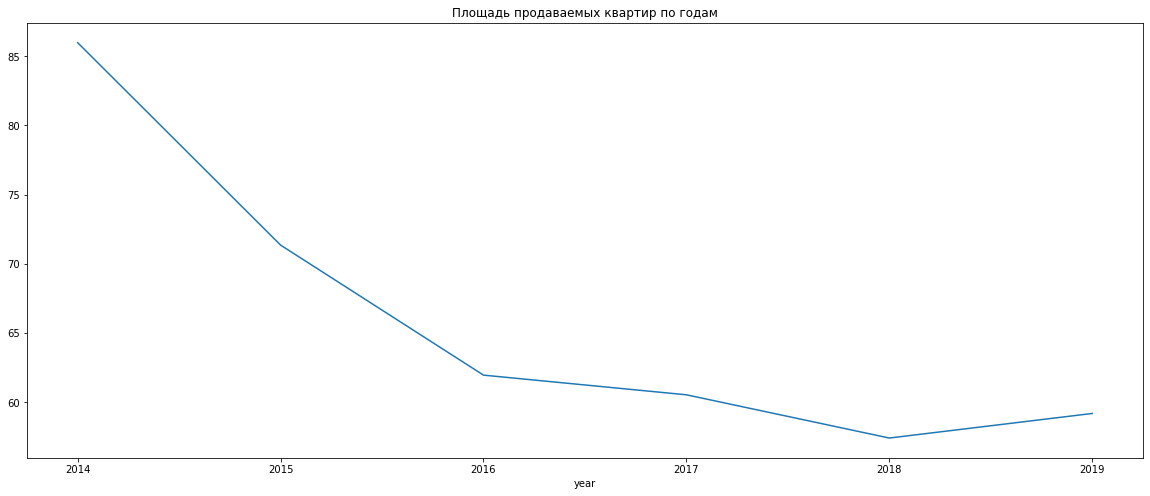

In [242]:
data.groupby('year')['total_area'].mean().plot(figsize = (20, 8))
plt.title('Площадь продаваемых квартир по годам');

*Наблюдаем, что цены падают из-за меньшей площади квартир*

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [243]:
locality_name_top10 = data.pivot_table(index='locality_only_name', values='last_price', aggfunc='count')
locality_name_top10 = locality_name_top10.sort_values(by='last_price', ascending=False)
locality_name_top10.head(10)


,last_price
locality_only_name,
Санкт-Петербург,15721
Мурино,590
Кудрово,472
Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
Парголово,327
Гатчина,307


In [244]:
#беру из data только те населенные пункты, которые были у меня в топ10
new_data = data.query('locality_only_name == "Санкт-Петербург" | locality_name == "Мурино" | locality_name == "Кудрово" | locality_name == "Шушары" | locality_name == "Всеволожск" | locality_name == "Пушкин" | locality_name == "Колпино" | locality_name == "Парголово	" | locality_name == "Гатчина" | locality_name == "Выборг"')
#создаю сводную таблицу для формирования среднего значению за кв.м. для каждого населённого пункта
new_data = new_data.pivot_table(index='locality_only_name', values='price_one_square_meter', aggfunc='mean')
new_data.sort_values(by='price_one_square_meter', ascending=False)


,price_one_square_meter
locality_only_name,
Санкт-Петербург,115347.723
Пушкин,103611.363
Кудрово,100851.950
Мурино,93557.005
Колпино,75735.590
Гатчина,69045.519
Всеволожск,68985.235
Выборг,58296.119


*Населенный пункт с самой высокой стоимостью: Санкт-Петербург=115347.723  
Населенный пункт с самой низкой стоимостью: Выборг	58296.119*



**Вычисление средней стоимости каждого километра для Санкт-Петербурга**

*Создаю новый датафрейм spb_data в который сохраню все строки, которые относятся к городу Санкт-Петербург и расстояние до центра не равно условному маркеру 55555 (пропущенным значениям).*

<AxesSubplot:xlabel='city_centers_nearest_km'>

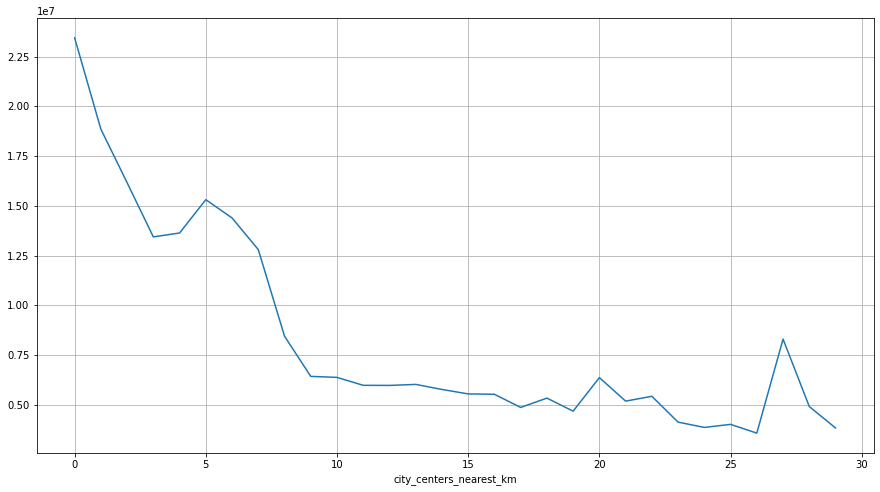

In [245]:
#срезаю датафрейм data 
spb_data = data.query('city_centers_nearest != 55555 and locality_only_name == "Санкт-Петербург"')
#группирую новую переменную для создания гистограммы
spb_data_price = spb_data.groupby('city_centers_nearest_km')['last_price'].agg('mean')
#вывожу гистограмму
spb_data_price.plot(x='city_centers_nearest_km', y='last_price', grid=True, figsize=(15, 8))


*Судя по графику центр Питера заканчивается на 8км. А то что имеется скачок на 3 км - это скорее всего квартиры, например с дорогим ремонтом или элитные квартиры.*

### Общий вывод

Самая большая общая площадь 900 м²  
Самая дорогая квартира 763млн рублей  
Самое большое количество комнат 19  
Самая большая площадь кухни 112 м²  
Самая маленькая общая площадь 12 м²  
Чем больше комнат, общая площадь, жилая площадь, площадь кухни, тем выше стоимость жилья    
На первом этаже самые дешевые квартиры, наиболее дорогие квартиры распагаются на последнем этаже  
Средняя стоимость жилья составляет 6,5 млн рублей  
Средняя площадь жилья составляет 60.121 м²  
Наиболее популярные квартиры имеют 1, 2, 3 комнаты  
Квартиры проданные в срок до 90 дня можно считать быстро проданными  
Квартиры проданные в срок, превышающий 90 дней можно считать долго продающимися  

Благодаря проделанному выше анализу, я мог бы избавиться от выбросов и аномальных значений, которые сильно искажают общую картину при анализе данных. Мог бы использовать при изучении зависимости цен от:  
общей площади;  
жилой площади;  
площади кухни;  
количества комнат;  
этажа, на котором расположена квартира (первый, последний, другой);  
даты размещения (день недели, месяц, год).  
Результат мог бы быть совсем другим.
